# Lead Scoring Case Study
## Group: Vaibhav Sharma and Ravi Edla

## Problem Statement: 
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their details, they are classified to be a lead. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

## Business Goal:
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Dataset:
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 

## Importing necessary Libraries

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_recall_curve

# Data display coustomization
pd.set_option('display.max_columns', 200)

# To ignore all warnings
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data
 1. Importing data using the pandas library
 2. Understanding the structure of the data

In [242]:
#Reading data 
lead_score_df = pd.read_csv(r'./Leads.csv')
lead_score_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [243]:
lead_score_df.shape

(9240, 37)

# Inspecting the Data

In [244]:
lead_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [245]:
lead_score_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [246]:
lead_score_df.loc[lead_score_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [247]:
lead_score_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [248]:
# Checking the percentage of missing values
round(100*(lead_score_df.isnull().sum()/len(lead_score_df)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Inference:
Duplicates data is not present in given dataset. Columns such as Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, Lead Quality have more than 40% of null data. We can remove those columns.

# Data Cleaning and Preperation

## Checking for unique values in all columns

In [249]:
unique_cols = lead_score_df.columns
for i in enumerate(unique_cols):
    print(i[1])
    print(lead_score_df[i[1]].unique())
    print('\n')

Prospect ID
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']


Lead Number
[660737 660728 660727 ... 579545 579538 579533]


Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']


Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


Do Not Email
['No' 'Yes']


Do Not Call
['No' 'Yes']


Converted
[0 1]


TotalVisits
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 11

## Visualizing Categorical data - Univariate Analysis

<Figure size 1296x1080 with 0 Axes>

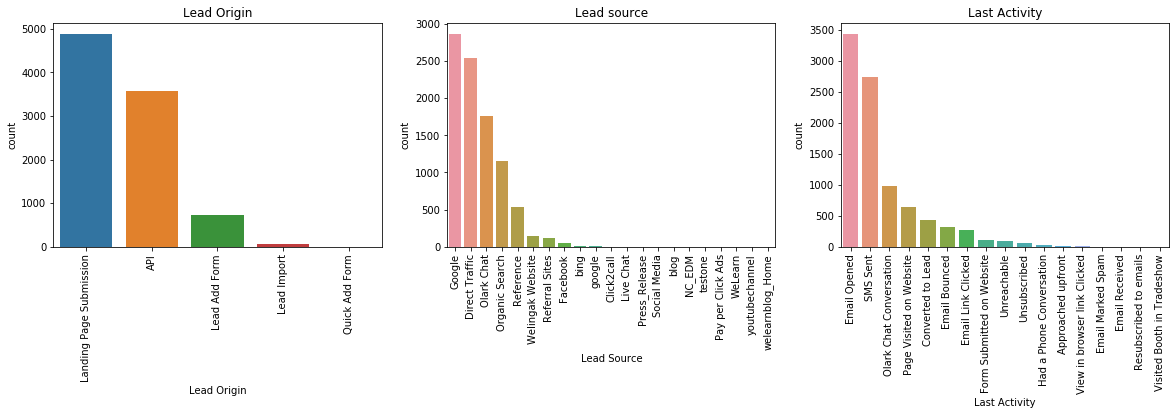

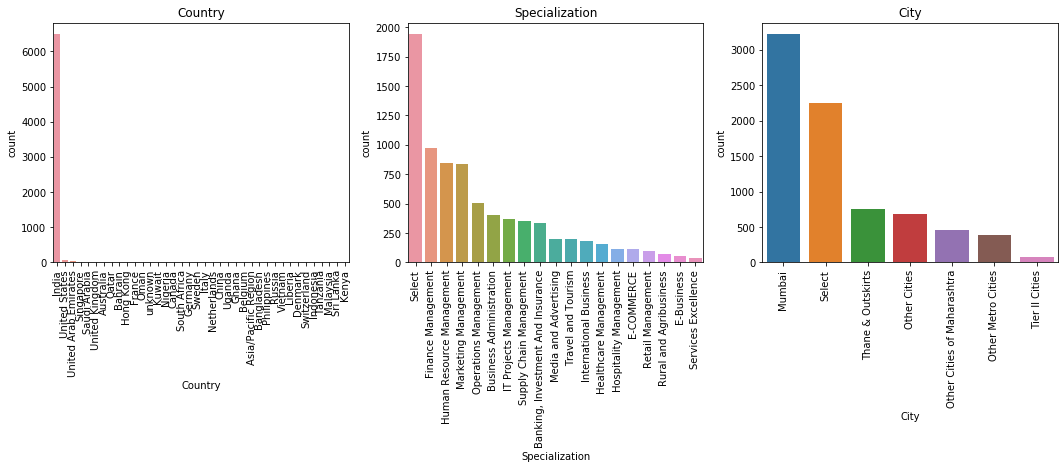

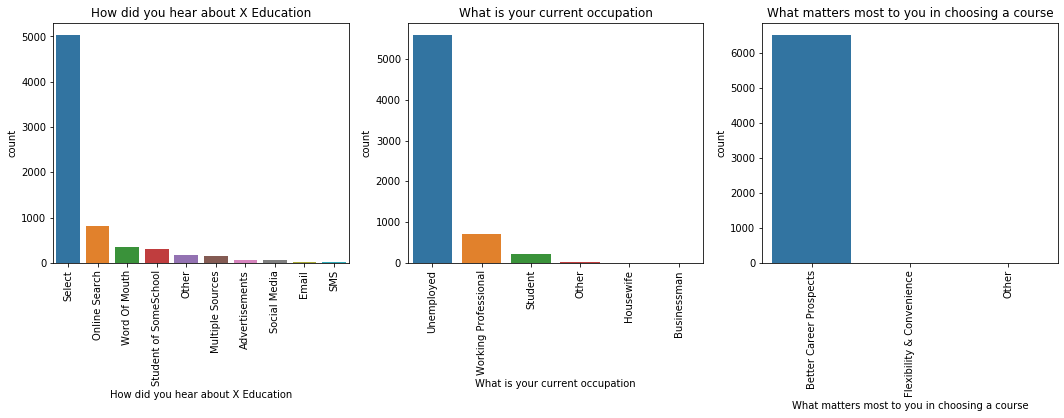

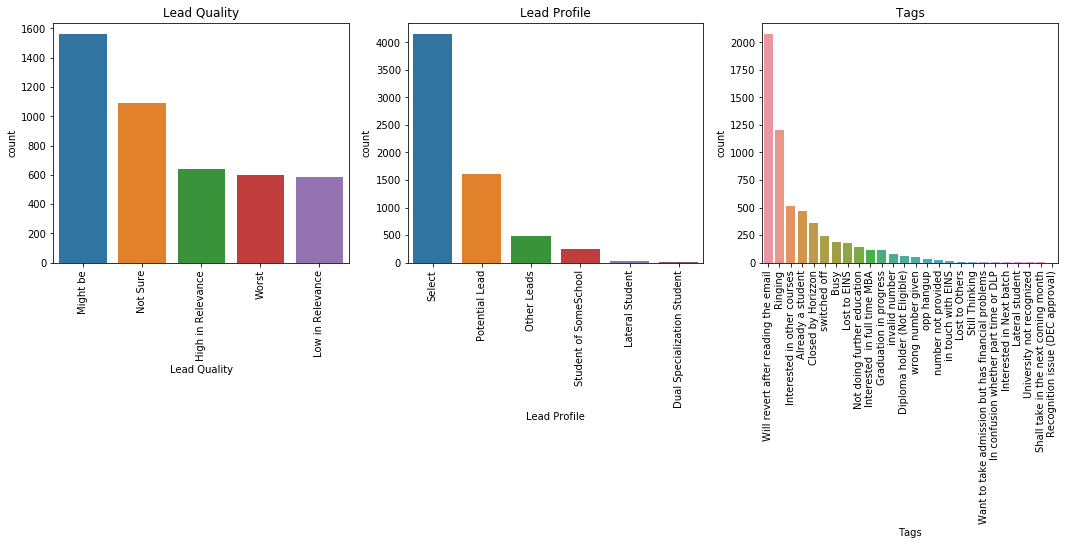

<Figure size 1296x1080 with 0 Axes>

In [250]:
plt.figure(figsize=(20,14))

plt.figure(1)

plt.subplot(3, 3, 1)
plt.title("Lead Origin")
sns.countplot(lead_score_df['Lead Origin'] , order = lead_score_df['Lead Origin'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(3, 3, 2)
plt.title("Lead source")
sns.countplot(lead_score_df['Lead Source'] , order = lead_score_df['Lead Source'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(3, 3, 3)
plt.title("Last Activity")
sns.countplot(lead_score_df['Last Activity'], order = lead_score_df['Last Activity'].value_counts().index)
plt.xticks(rotation=90)

plt.figure(figsize=(18,15))
plt.figure(2)

plt.subplot(3, 3, 1)
plt.title("Country")
sns.countplot(lead_score_df['Country'] , order = lead_score_df['Country'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(3, 3, 2)
plt.title("Specialization")
sns.countplot(lead_score_df['Specialization'] , order = lead_score_df['Specialization'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(3, 3, 3)
plt.title("City")
sns.countplot(lead_score_df['City'] , order = lead_score_df['City'].value_counts().index)
plt.xticks(rotation=90)

plt.figure(figsize=(18,15))

plt.figure(3)

plt.subplot(3, 3, 1)
plt.title("How did you hear about X Education")
sns.countplot(lead_score_df['How did you hear about X Education'] , order = lead_score_df['How did you hear about X Education'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(3, 3, 2)
plt.title("What is your current occupation")
sns.countplot(lead_score_df['What is your current occupation'] , order = lead_score_df['What is your current occupation'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(3, 3, 3)
plt.title("What matters most to you in choosing a course")
sns.countplot(lead_score_df['What matters most to you in choosing a course'] , order = lead_score_df['What matters most to you in choosing a course'].value_counts().index)
plt.xticks(rotation=90)
plt.figure(figsize=(18,15))

plt.figure(4)

plt.subplot(3, 3, 1)
plt.title("Lead Quality")
sns.countplot(lead_score_df['Lead Quality'] , order = lead_score_df['Lead Quality'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(3, 3, 2)
plt.title("Lead Profile")
sns.countplot(lead_score_df['Lead Profile'] , order = lead_score_df['Lead Profile'].value_counts().index)
plt.xticks(rotation=90)


plt.subplot(3, 3, 3)
plt.title("Tags")
sns.countplot(lead_score_df['Tags'] , order = lead_score_df['Tags'].value_counts().index)
plt.xticks(rotation=90)
plt.figure(figsize=(18,15))


### Inference: 
Major lead origins from 'Landing Page Submission' and 'API'. Major source of leads are 'Google','Direct traffic','Olark Chat' with most traffic coming from 'India'.
We can see that there are few columns where 'Select' values are high in numbers. These data points are not adding any valuable information so we can treat them as NULL

In [251]:
#Cleaning Data
# replace Select as Nan
lead_score_df = lead_score_df.replace('Select', np.nan)
lead_score_df['Lead Source'] = lead_score_df['Lead Source'].replace('google', 'Google')

## Merging all categories of lead source with less frequency, into a new category 'Others'
lead_score_df['Lead Source'] = lead_score_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [252]:
#Checking Null values
round(100*(lead_score_df.isnull().sum()/len(lead_score_df)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Removing columns with more than 45% of missing data

In [253]:
null45 = ['Lead Quality', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education','Lead Profile']
lead_score_df = lead_score_df.drop(columns=null45)

### Treating missing/NULL values

In [254]:
print(lead_score_df['Country'].describe())
print('\n')
print(lead_score_df['Country'].mode())
lead_score_df['Country'] = lead_score_df['Country'].fillna(lead_score_df['Country'].mode().iloc[0])

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object


0    India
dtype: object


In [255]:
print(lead_score_df['Specialization'].describe())
print('\n')
print(lead_score_df['Specialization'].mode())
lead_score_df['Specialization'] = lead_score_df['Specialization'].fillna(lead_score_df['Specialization'].mode().iloc[0])

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object


0    Finance Management
dtype: object


In [256]:
print(lead_score_df['What is your current occupation'].describe())
print('\n')
print(lead_score_df['What is your current occupation'].mode())
lead_score_df['What is your current occupation'] = lead_score_df['What is your current occupation'].fillna(lead_score_df['What is your current occupation'].mode().iloc[0])

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object


0    Unemployed
dtype: object


In [257]:
print(lead_score_df['What matters most to you in choosing a course'].describe())
print('\n')
print(lead_score_df['What matters most to you in choosing a course'].mode())
lead_score_df['What matters most to you in choosing a course'] = lead_score_df['What matters most to you in choosing a course'].fillna(lead_score_df['What matters most to you in choosing a course'].mode().iloc[0])

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object


0    Better Career Prospects
dtype: object


In [258]:
# Dropping Tags as it is not providing any info and not useful in Model
lead_score_df= lead_score_df.drop(columns=['Tags'])

In [259]:
print(lead_score_df['City'].describe())
print('\n')
lead_score_df['City'] = lead_score_df['City'].fillna(lead_score_df['City'].mode().iloc[0])

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object




### Dropping rows with NULL values

In [260]:
lead_score_df.dropna(inplace = True)
lead_score_df.shape

(9074, 29)

In [261]:
round(100*(lead_score_df.isnull().sum()/len(lead_score_df)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## Checking for outliers
### Since most of the data is categorical so we have to check few columns

In [262]:
cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
lead_score_df[cols].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


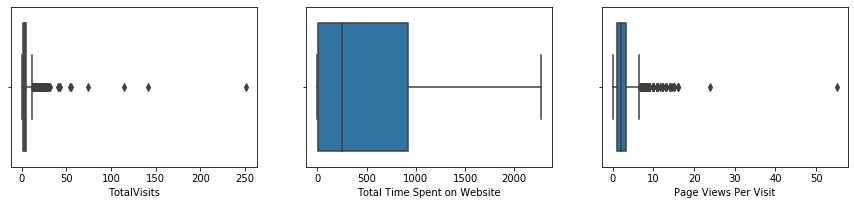

In [263]:
plt.figure(figsize = (15,10) )
for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data= lead_score_df)

In [264]:
Q1 = lead_score_df['TotalVisits'].quantile(0.05)
Q3 = lead_score_df['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads = lead_score_df[(lead_score_df['TotalVisits'] >= Q1) & (lead_score_df['TotalVisits'] <= Q3)]

In [265]:
Q1 = lead_score_df['Total Time Spent on Website'].quantile(0.05)
Q3 = lead_score_df['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
leads = lead_score_df[(lead_score_df['Total Time Spent on Website'] >= Q1) & (lead_score_df['Total Time Spent on Website'] <= Q3)]


In [266]:
Q1 = lead_score_df['Page Views Per Visit'].quantile(0.05)
Q3 = lead_score_df['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
lead_score_df = lead_score_df[(lead_score_df['Page Views Per Visit'] >= Q1) & (lead_score_df['Page Views Per Visit'] <= Q3)]

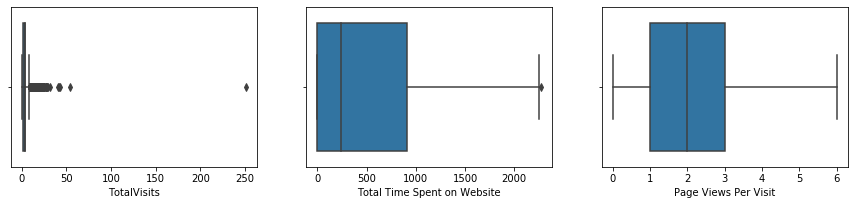

In [267]:
plt.figure(figsize = (15,10) )
for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data= lead_score_df)

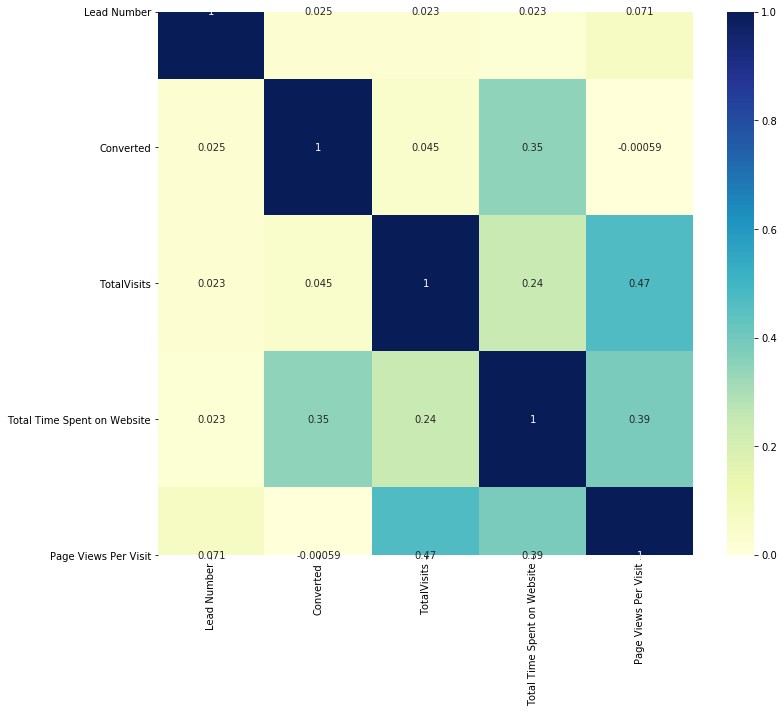

In [268]:
plt.figure(figsize = (12, 10))
sns.heatmap(lead_score_df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

### Inference:
 most of the continuous columns are less correlated.

## Converting categorical columns into binary columns 
#### Binary Variables

In [269]:
lead_score_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


### Checking for unique values in Categorical Columns

In [270]:
unique_columns = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

In [271]:
for i in enumerate(unique_columns):
    print(i[1])
    print(lead_score_df[i[1]].unique())
    print('\n')

Do Not Email
['No' 'Yes']


Do Not Call
['No' 'Yes']


Search
['No' 'Yes']


Magazine
['No']


Newspaper Article
['No' 'Yes']


X Education Forums
['No' 'Yes']


Newspaper
['No' 'Yes']


Digital Advertisement
['No' 'Yes']


Through Recommendations
['No' 'Yes']


Receive More Updates About Our Courses
['No']


Update me on Supply Chain Content
['No']


Get updates on DM Content
['No']


I agree to pay the amount through cheque
['No']


A free copy of Mastering The Interview
['No' 'Yes']




### Dropping irrelevant Columns from Dataset

In [272]:
irr_cols = ['Prospect ID','Magazine','Newspaper Article','X Education Forums','Newspaper','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Country','City','What matters most to you in choosing a course','Search','A free copy of Mastering The Interview']
lead_score_df = lead_score_df.drop(irr_cols,axis=1)
leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Thane & Outskirts,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.0,Email Opened,India,Travel and Tourism,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Other Metro Cities,No,Yes,Email Opened


In [273]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
cols1 = ['Do Not Email','Do Not Call','Digital Advertisement','Through Recommendations']
lead_score_df[cols1] = lead_score_df[cols1].apply(binary_map)
lead_score_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Digital Advertisement,Through Recommendations,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,0,0,Modified


##  Creating Dummy Variables for multi-level categorical columns

In [274]:
Dummy_col = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Last Notable Activity']

In [275]:
Dummy1 = pd.get_dummies(lead_score_df[Dummy_col], drop_first=True)
Dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [276]:
lead_score_df1 = pd.concat([lead_score_df, Dummy1], axis=1)
lead_score_df1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Digital Advertisement,Through Recommendations,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,0,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,0,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,0,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [277]:
lead_score_df1.shape


(8714, 79)

In [278]:
lead_score_df1 = lead_score_df1.drop(Dummy_col, axis = 1)
lead_score_df1.shape

(8714, 73)

In [279]:
lead_score_df1.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


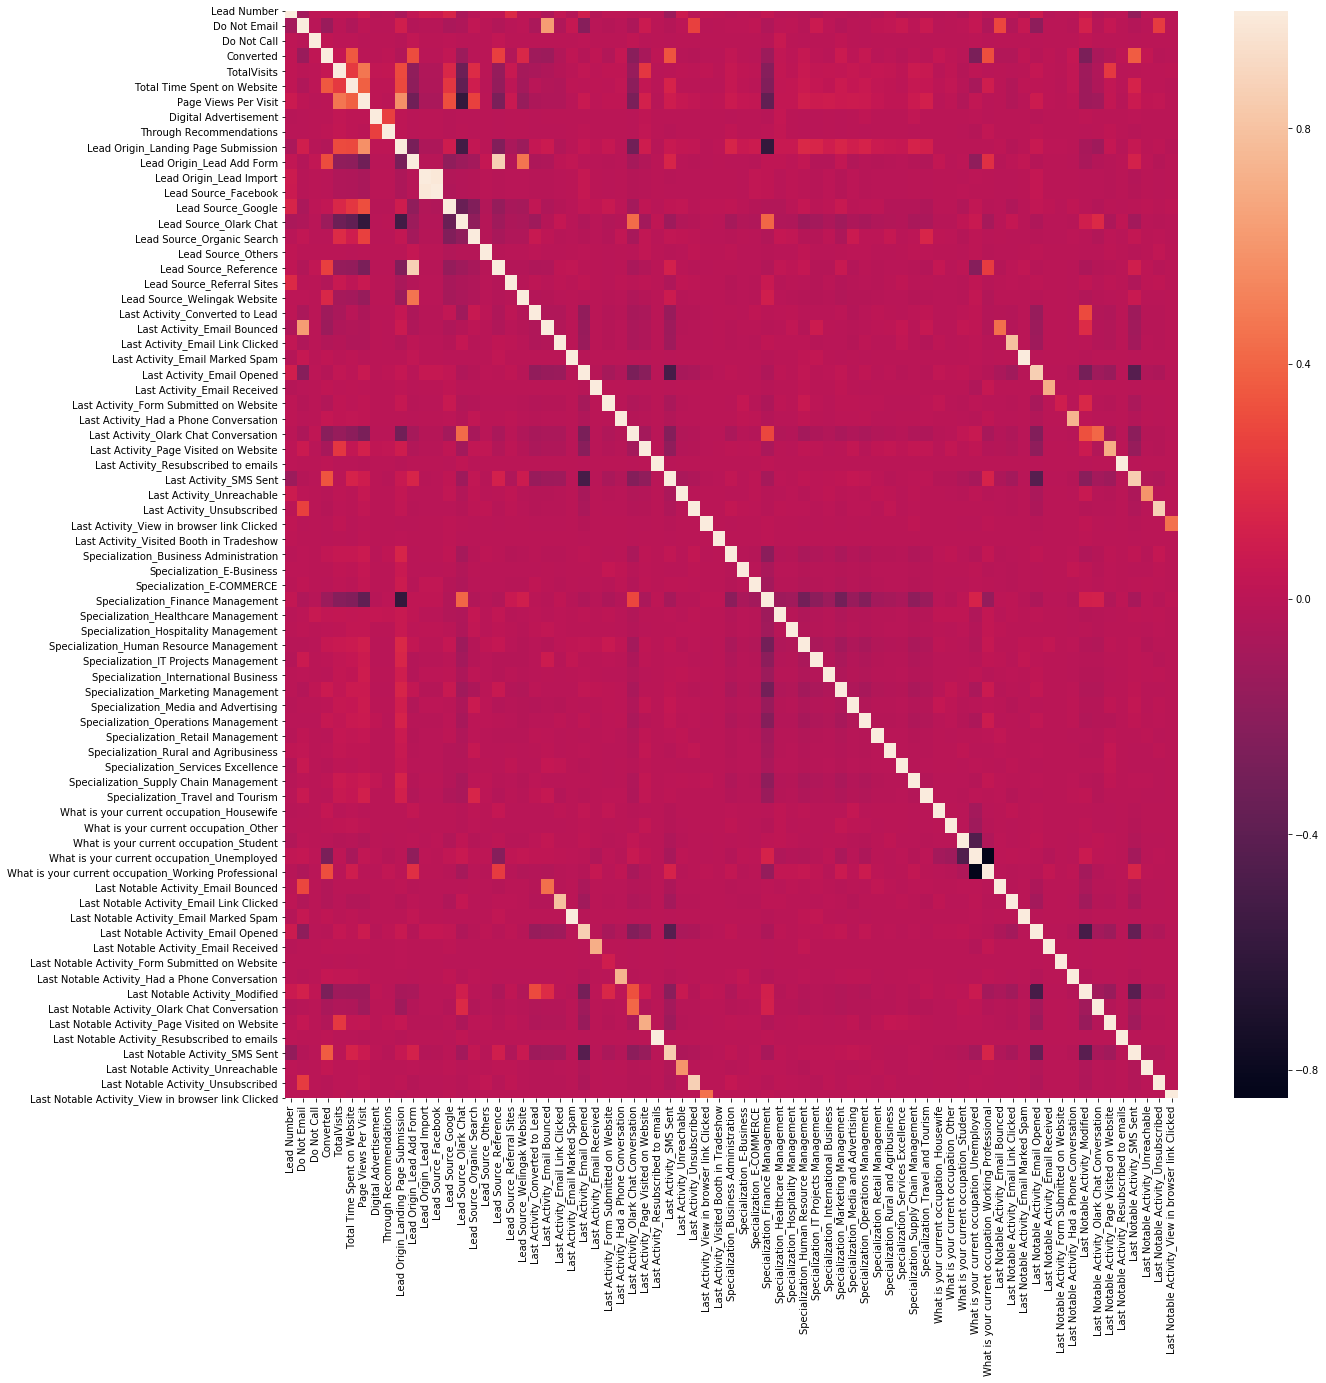

In [280]:
# correlation matrix 
plt.figure(figsize = (20,20))
sns.heatmap(lead_score_df1.corr())
plt.show()

# Train-Test Split

In [281]:
# Putting feature variable to X
X = lead_score_df1.drop(['Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [282]:
# Putting response variable to y
y = lead_score_df1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [283]:
# Splitting the data into Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [284]:
print('X Train Data:',X_train.shape)
print('X Test Data:',X_test.shape)
print('y Train Data:',y_train.shape)
print('y Test Data:',y_test.shape)

X Train Data: (6099, 71)
X Test Data: (2615, 71)
y Train Data: (6099,)
y Test Data: (2615,)


### Scaling of Continuous Variables in data

In [285]:
scaler = StandardScaler()
cols2 = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[cols2] = scaler.fit_transform(X_train[cols2])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7122,1,0,-0.473080,-0.401646,-0.676244,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5261,0,0,1.472514,-0.213414,0.231492,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3585,0,0,-0.689258,-0.877762,-1.281402,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
228,0,0,0.823983,-0.741202,0.128615,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5330,0,0,0.607806,2.034297,0.534070,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Checking the Lead Conversion Rate

In [286]:
conversion_rate = (sum(lead_score_df1['Converted'])/len(lead_score_df1['Converted']))*100
conversion_rate

37.835666743171906

# Model Building

In [287]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6099
Model:                            GLM   Df Residuals:                     6029
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Apr 2020   Deviance:                          nan
Time:                        22:39:48   Pearson chi2:                 6.81e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.109e+14    7.4e+07   -1.5e+06      0.000   -1.11e+14   -1.11e+14
Do Not Email                                         -8.473e+13   4.74e+06  -1.79e+07      0.000   -8.47e+13   -8.47e+13
Do Not Call                                           2.565e+15   4.77e+07   5.37e+07      0.000    2.56e+15    2.56e+15
TotalVisits                                            1.14e+14   9.96e+05   1.14e+08      0.000    1.14e+14    1.14e+14
Total Time Spent on Website                           7.932e+14      1e+06   7.93e+08      0.000    7.93e+14    7.93e+14
Page Views Per Visit                                  -9.78e+13   1.42e+06  -6.86e+07      0.000   -9.78e+13   -9.78e+13
Digital Advertisement                                -9.643e+13   4.06e+07  -2.37e+06      0.000   -9.64e+13   -9.64e+13
Through Recommendations                              -7.822e+13   3.52e+07  -2.22e+06      0.000   -7.82e+13   -7.82e+13
Lead Origin_Landing Page Submission                  -3.068e+14   2.96e+06  -1.04e+08      0.000   -3.07e+14   -3.07e+14
Lead Origin_Lead Add Form                            -1.266e+14   3.18e+07  -3.98e+06      0.000   -1.27e+14   -1.27e+14
Lead Origin_Lead Import                               3.193e+15   6.94e+07    4.6e+07      0.000    3.19e+15    3.19e+15
Lead Source_Facebook                                 -3.273e+15   6.74e+07  -4.86e+07      0.000   -3.27e+15   -3.27e+15
Lead Source_Google                                    2.273e+14   2.49e+06   9.14e+07      0.000    2.27e+14    2.27e+14
Lead Source_Olark Chat                               -1.971e+14   3.95e+06  -4.99e+07      0.000   -1.97e+14   -1.97e+14
Lead Source_Organic Search                            1.807e+14   3.39e+06   5.34e+07      0.000    1.81e+14    1.81e+14
Lead Source_Others                                    1.007e+14   1.74e+07    5.8e+06      0.000    1.01e+14    1.01e+14
Lead Source_Reference                                 2.043e+15   3.21e+07   6.36e+07      0.000    2.04e+15    2.04e+15
Lead Source_Referral Sites                           -1.935e+13   8.09e+06  -2.39e+06      0.000   -1.93e+13   -1.93e+13
Lead Source_Welingak Website                          2.499e+15   3.27e+07   7.64e+07      0.000     2.5e+15     2.5e+15
Last Activity_Converted to Lead                      -3.676e+15   3.39e+07  -1.09e+08      0.000   -3.68e+15   -3.68e+15
Last Activity_Email Bounced                           -4.47e+15   3.43e+07   -1.3e+08      0.000   -4.47e+15   -4.47e+15
Last Activity_Email Link Clicked                      -3.16e+15   3.46e+07  -9.13e+07      0.000   -3.16e+15   -3.16e+15
Last Activity_Email Marked Spam                       1.97

## Feature Selection Using RFE

In [288]:
logreg = LogisticRegression()
# running RFE with 16 variables as output
rfe = RFE(logreg, 16)
rfe = rfe.fit(X_train, y_train)

In [289]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 16),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Digital Advertisement', False, 39),
 ('Through Recommendations', False, 35),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 26),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Marked Spam', False, 24),
 ('Last Activity_Email Opened', False, 36),
 ('Last Activity_Email Received', False, 51),
 ('Last Activity_Form Sub

In [290]:
cols3 = X_train.columns[rfe.support_]
cols3

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Checking P-value and Coeff for each selected features

In [291]:
X_train_sm = sm.add_constant(X_train[cols3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6099
Model:                            GLM   Df Residuals:                     6082
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2530.7
Date:                Mon, 20 Apr 2020   Deviance:                       5061.4
Time:                        22:39:50   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4146      0.054    -26.144      0.000      -1.521      -1.309
Do Not Email                                            -1.3269      0.203     -6.551      0.000      -1.724      -0.930
Total Time Spent on Website                              1.1217      0.041     27.369      0.000       1.041       1.202
Lead Origin_Lead Add Form                                2.7905      1.237      2.256      0.024       0.367       5.215
Lead Origin_Lead Import                                  1.4594      0.533      2.737      0.006       0.415       2.504
Lead Source_Olark Chat                                   1.2441      0.104     11.967      0.000       1.040       1.448
Lead Source_Reference                                    1.4556      1.260      1.155      0.248      -1.013       3.925
Lead Source_Welingak Website                             2.9786      1.433      2.079      0.038       0.171       5.786
Last Activity_Converted to Lead                         -1.0742      0.204     -5.259      0.000      -1.475      -0.674
Last Activity_Email Bounced                             -1.7628      0.586     -3.009      0.003      -2.911      -0.614
Last Activity_Had a Phone Conversation                   2.2391      0.700      3.201      0.001       0.868       3.610
Last Activity_Olark Chat Conversation                   -1.5210      0.163     -9.358      0.000      -1.840      -1.202
What is your current occupation_Housewife               23.2317   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
What is your current occupation_Working Professional     2.6712      0.186     14.364      0.000       2.307       3.036
Last Notable Activity_Email Bounced                      2.0599      0.740      2.783      0.005       0.609       3.511
Last Notable Activity_SMS Sent                           1.5820      0.082     19.242      0.000       1.421       1.743
Last Notable Activity_Unreachable                        2.0989      0.521      4.027      0.000       1.077       3.120
========================================================================================================================
"""

In [292]:
# 'What is your current occupation_Housewife' column have the highest p-value, we will drop the feature
cols4 = cols3.drop('What is your current occupation_Housewife',1)

In [293]:
#creating model with updated columns list
X_train_sm = sm.add_constant(X_train[cols4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6099
Model:                            GLM   Df Residuals:                     6083
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.3
Date:                Mon, 20 Apr 2020   Deviance:                       5074.7
Time:                        22:39:51   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4057      0.054    -26.064      0.000      -1.511      -1.300
Do Not Email                                            -1.3307      0.202     -6.571      0.000      -1.728      -0.934
Total Time Spent on Website                              1.1204      0.041     27.372      0.000       1.040       1.201
Lead Origin_Lead Add Form                                2.7820      1.236      2.250      0.024       0.359       5.205
Lead Origin_Lead Import                                  1.4500      0.533      2.721      0.007       0.405       2.495
Lead Source_Olark Chat                                   1.2370      0.104     11.915      0.000       1.034       1.441
Lead Source_Reference                                    1.4722      1.259      1.169      0.242      -0.996       3.940
Lead Source_Welingak Website                             2.9794      1.432      2.080      0.037       0.172       5.787
Last Activity_Converted to Lead                         -1.0818      0.204     -5.299      0.000      -1.482      -0.682
Last Activity_Email Bounced                             -1.7659      0.586     -3.014      0.003      -2.914      -0.618
Last Activity_Had a Phone Conversation                   2.2304      0.699      3.189      0.001       0.860       3.601
Last Activity_Olark Chat Conversation                   -1.5252      0.162     -9.386      0.000      -1.844      -1.207
What is your current occupation_Working Professional     2.6655      0.186     14.335      0.000       2.301       3.030
Last Notable Activity_Email Bounced                      2.0600      0.740      2.783      0.005       0.609       3.511
Last Notable Activity_SMS Sent                           1.5747      0.082     19.172      0.000       1.414       1.736
Last Notable Activity_Unreachable                        2.0909      0.521      4.013      0.000       1.070       3.112
========================================================================================================================
"""

In [294]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols4].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols4].values, i) for i in range(X_train[cols4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,77.83
5,Lead Source_Reference,61.42
6,Lead Source_Welingak Website,17.63
8,Last Activity_Email Bounced,2.03
0,Do Not Email,1.83
4,Lead Source_Olark Chat,1.59
10,Last Activity_Olark Chat Conversation,1.36
1,Total Time Spent on Website,1.28
12,Last Notable Activity_Email Bounced,1.23
13,Last Notable Activity_SMS Sent,1.20


In [295]:
updated_col = cols4.drop('Last Activity_Email Bounced', 1)
updated_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [296]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[updated_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6099
Model:                            GLM   Df Residuals:                     6084
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.9
Date:                Mon, 20 Apr 2020   Deviance:                       5087.9
Time:                        22:39:51   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4161      0.054    -26.257      0.000      -1.522      -1.310
Do Not Email                                            -1.6460      0.186     -8.867      0.000      -2.010      -1.282
Total Time Spent on Website                              1.1208      0.041     27.410      0.000       1.041       1.201
Lead Origin_Lead Add Form                                2.7882      1.237      2.253      0.024       0.363       5.214
Lead Origin_Lead Import                                  1.4589      0.533      2.736      0.006       0.414       2.504
Lead Source_Olark Chat                                   1.2318      0.104     11.874      0.000       1.028       1.435
Lead Source_Reference                                    1.4931      1.261      1.184      0.236      -0.978       3.964
Lead Source_Welingak Website                             3.0297      1.434      2.112      0.035       0.218       5.841
Last Activity_Converted to Lead                         -1.0719      0.204     -5.249      0.000      -1.472      -0.672
Last Activity_Had a Phone Conversation                   2.2406      0.700      3.203      0.001       0.870       3.612
Last Activity_Olark Chat Conversation                   -1.5099      0.163     -9.290      0.000      -1.828      -1.191
What is your current occupation_Working Professional     2.6688      0.186     14.371      0.000       2.305       3.033
Last Notable Activity_Email Bounced                      0.6190      0.515      1.202      0.229      -0.390       1.628
Last Notable Activity_SMS Sent                           1.6030      0.082     19.544      0.000       1.442       1.764
Last Notable Activity_Unreachable                        2.1021      0.521      4.034      0.000       1.081       3.123
========================================================================================================================
"""

### Getting the predicted values on the train set

In [297]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7122    0.028965
5261    0.160389
3585    0.237191
228     0.095621
5330    0.703459
664     0.108895
2024    0.098889
7826    0.091615
3353    0.662296
2416    0.097971
dtype: float64

In [298]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02896478, 0.16038916, 0.2371913 , 0.09562051, 0.70345862,
       0.10889458, 0.09888879, 0.09161539, 0.66229561, 0.09797109])

### Creating a dataframe with the actual Converted column and the predicted probabilities

In [299]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.028965,7122
1,0,0.160389,5261
2,0,0.237191,3585
3,0,0.095621,228
4,1,0.703459,5330


In [300]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted
0,0,0.028965,7122,0
1,0,0.160389,5261,0
2,0,0.237191,3585,0
3,0,0.095621,228,0
4,1,0.703459,5330,1


In [301]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3355  443]
 [ 722 1579]]


In [302]:
# Predicted     Not_Converted    Converted
# Actual
# Not_Converted        3355      443
# Converted            722       1579  

In [303]:
#Overall accuracy
print('Accuracy is',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy is 0.808985079521233


In [304]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [305]:
# Sensitivity of model
TP / float(TP+FN)

0.6862233811386353

In [306]:
# Specificity
TN / float(TN+FP)

0.883359662980516

In [307]:
# False postive rate
print(FP/ float(TN+FP))

0.11664033701948394


In [308]:
# positive predictive value 
print (TP / float(TP+FP))

0.7809099901088031


In [309]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8229090017169487


## ROC Curve

In [310]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [311]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

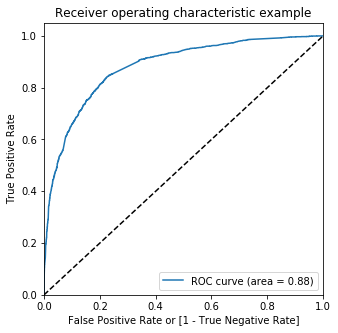

In [312]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##  Optimal Cutoff Point

In [313]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.028965,7122,0,1,0,0,0,0,0,0,0,0,0
1,0,0.160389,5261,0,1,1,0,0,0,0,0,0,0,0
2,0,0.237191,3585,0,1,1,1,0,0,0,0,0,0,0
3,0,0.095621,228,0,1,0,0,0,0,0,0,0,0,0
4,1,0.703459,5330,1,1,1,1,1,1,1,1,1,0,0


In [314]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377275  1.000000  0.000000
0.1   0.1  0.595999  0.966102  0.371775
0.2   0.2  0.742909  0.910908  0.641127
0.3   0.3  0.801279  0.834854  0.780937
0.4   0.4  0.807509  0.762277  0.834913
0.5   0.5  0.808985  0.686223  0.883360
0.6   0.6  0.804722  0.615385  0.919431
0.7   0.7  0.779964  0.492829  0.953923
0.8   0.8  0.761928  0.413299  0.973144
0.9   0.9  0.712412  0.255976  0.988942


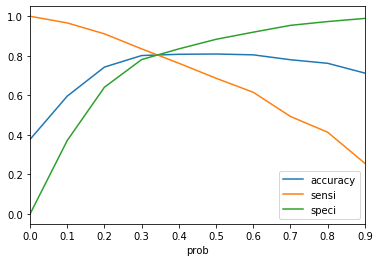

In [315]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the cutoff point

In [316]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.028965,7122,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.160389,5261,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.237191,3585,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.095621,228,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.703459,5330,1,1,1,1,1,1,1,1,1,0,0,1


In [317]:
#Allocating Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.028965,7122,0,1,0,0,0,0,0,0,0,0,0,0,3
1,0,0.160389,5261,0,1,1,0,0,0,0,0,0,0,0,0,16
2,0,0.237191,3585,0,1,1,1,0,0,0,0,0,0,0,0,24
3,0,0.095621,228,0,1,0,0,0,0,0,0,0,0,0,0,10
4,1,0.703459,5330,1,1,1,1,1,1,1,1,1,0,0,1,70


In [318]:
# Overall Accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8012788981800295

In [319]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [320]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8348544111255976

In [321]:
# Specificity
TN / float(TN+FP)

0.7809373354397051

In [322]:
# Calculate false postive rate - predicting converted when not
print(FP/ float(TN+FP))

0.21906266456029488


In [323]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6977842353795859


In [324]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8864315600717274


# Precision and Recall

In [325]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3355,  443],
       [ 722, 1579]], dtype=int64)

In [326]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7809099901088031

In [327]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6862233811386353

In [328]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7809099901088031

In [329]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6862233811386353

In [330]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6094    1
 6095    0
 6096    0
 6097    1
 6098    1
 Name: Converted, Length: 6099, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6094    1
 6095    0
 6096    0
 6097    0
 6098    0
 Name: Predicted, Length: 6099, dtype: int64)

In [331]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

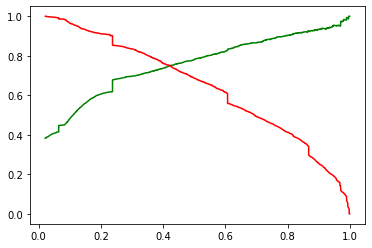

In [332]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [333]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1864,0,0,0.892053,-0.485870,2.347991,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1028,0,0,-0.974121,-0.871018,-1.262614,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1508,0,0,0.269995,-0.289662,1.144456,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2574,0,0,0.269995,2.108431,1.144456,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4272,0,0,0.581024,0.130004,0.241805,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [334]:
X_test = X_test[updated_col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
1864,0,-0.485870,0,0,0,0,0,0,0,0,0,0,0,0
1028,0,-0.871018,0,0,1,0,0,0,0,1,0,0,0,0
1508,0,-0.289662,0,0,0,0,0,0,0,0,0,0,0,0
2574,0,2.108431,0,0,0,0,0,0,0,0,0,0,0,0
4272,0,0.130004,0,0,0,0,0,0,0,0,0,0,1,0


In [335]:
X_test_sm = sm.add_constant(X_test)

In [336]:
#making predition on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1864    0.123392
1028    0.064737
1508    0.149212
2574    0.720493
4272    0.582381
8505    0.995430
7336    0.238562
1891    0.064737
4206    0.666499
703     0.092079
dtype: float64

In [337]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1864,0.123392
1028,0.064737
1508,0.149212
2574,0.720493
4272,0.582381


In [338]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index


In [339]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [340]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,1864,0.123392
1,0,1028,0.064737
2,0,1508,0.149212
3,1,2574,0.720493
4,1,4272,0.582381


In [341]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Converted_probability
0,0,1864,0.123392
1,0,1028,0.064737
2,0,1508,0.149212
3,1,2574,0.720493
4,1,4272,0.582381


In [342]:
y_pred_final['final_predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Lead Number,Converted_probability,final_predicted
0,0,1864,0.123392,0
1,0,1028,0.064737,0
2,0,1508,0.149212,0
3,1,2574,0.720493,1
4,1,4272,0.582381,1


In [343]:
# Overall Accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7992351816443595

In [344]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1264,  355],
       [ 170,  826]], dtype=int64)

In [345]:
# Sensitivity of logistic regression model
TP / float(TP+FN)

0.8348544111255976

In [346]:
# Specificity
TN / float(TN+FP)

0.7809373354397051

In [347]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.21906266456029488


In [348]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6977842353795859


In [349]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8864315600717274
